# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

# 데이터를 확인하고 전처리해보자

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

df = pd.read_csv('C:\workspace\python\wassup\data\data\데이터분석\mini.csv')
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [2]:
# df.columns?

칼럼명이 영어니깐 보기도 어렵고 너무 길다. 한글로 바꿔주자

In [3]:
columns = ['아이디', '가입기간(월)', '최종로그인(일)', '평균접속시간', '학습평균시간(분)', '월간학습일', '완료코스', '학습성취도', '중단학습수', '커뮤참여도', '선호난도', '구독유형', '문의이력', '결제패턴', '연장여부']

df.columns = columns
df

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


소수점이 있는 데이터들은 정수로 바꿔줘도 괜찮을거 같다

In [4]:
df['평균접속시간'] = df['평균접속시간'].round(0).astype(int)
df['학습평균시간(분)'] = df['학습평균시간(분)'].round(0).astype(int)
df['학습성취도'] = df['학습성취도'].round(0).astype(int)

df

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부
0,b919c29d,13,14,15,8,18,16,68,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18,73,16,13,98,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16,22,13,14,94,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,18,43,19,18,70,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21,31,19,10,82,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,15,84,18,16,65,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19,45,9,8,83,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18,127,24,14,82,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,19,5,10,10,90,4,5,Low,Basic,2,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   아이디        10000 non-null  object
 1   가입기간(월)    10000 non-null  int64 
 2   최종로그인(일)   10000 non-null  int64 
 3   평균접속시간     10000 non-null  int32 
 4   학습평균시간(분)  10000 non-null  int32 
 5   월간학습일      10000 non-null  int64 
 6   완료코스       10000 non-null  int64 
 7   학습성취도      10000 non-null  int32 
 8   중단학습수      10000 non-null  int64 
 9   커뮤참여도      10000 non-null  int64 
 10  선호난도       10000 non-null  object
 11  구독유형       10000 non-null  object
 12  문의이력       10000 non-null  int64 
 13  결제패턴       10000 non-null  int64 
 14  연장여부       10000 non-null  int64 
dtypes: int32(3), int64(9), object(3)
memory usage: 1.0+ MB


In [6]:
df.describe(include = 'all')

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.995200,54.911800,12.545400,12.227500,75.026600,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.018325,56.023837,6.932239,3.634125,9.973046,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,36.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.000000,15.000000,7.000000,10.000000,68.000000,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,15.000000,38.000000,13.000000,12.000000,75.000000,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,17.000000,76.000000,19.000000,15.000000,82.000000,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [7]:
df.describe()

,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,문의이력,결제패턴,연장여부
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.995200,54.911800,12.545400,12.227500,75.026600,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.018325,56.023837,6.932239,3.634125,9.973046,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,36.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.000000,15.000000,7.000000,10.000000,68.000000,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,15.000000,38.000000,13.000000,12.000000,75.000000,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,17.000000,76.000000,19.000000,15.000000,82.000000,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,27.000000,503.000000,24.000000,27.000000,113.000000,12.000000,5.000000,10.000000,7.000000,1.000000


평균접속시간(사용자의 일반적인 로그인 시간) 이 27시? 24시간이 넘어갈수도 있나? 24시 이상인 데이터를 확인해보자

In [8]:
df[df['평균접속시간']>=24]

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부
142,5ad41276,20,12,25,5,7,2,86,5,5,Medium,Basic,2,5,0
436,f89054f0,11,16,24,26,13,11,90,2,3,Low,Basic,2,5,1
996,1c53992c,7,16,24,119,17,9,58,5,4,Low,Premium,1,1,1
1020,e6b7f442,5,14,24,43,4,11,65,3,3,Low,Basic,1,2,0
1123,6133388b,19,2,24,117,6,11,84,0,5,High,Premium,4,6,1
1195,38608e74,15,24,24,121,10,14,84,4,5,Medium,Premium,3,2,0
1831,d73a1cb2,22,12,24,44,5,16,83,1,5,Low,Premium,2,1,0
1954,8fb3f7bf,7,18,24,48,20,14,57,1,2,Low,Basic,3,2,0
2894,29f8d7db,16,19,25,39,7,14,83,1,2,Low,Basic,2,4,1
2967,b57f0ca4,4,14,25,12,12,10,77,3,5,High,Basic,3,6,1


전체 데이터 대비 많은 비율은 아닌거 같다. 빼볼까.......?

In [9]:
df = df[df['평균접속시간'] < 24]

학습평균시간(분)(각 학습 세션에 소요된 평균 시간 (분)) 이 큰 애들은 이상치일까..? 근데 너무 많은거 같기도 하고..복습했을 수도 있을까? 일단 자세한 정보가 없으니 넘어가자

In [10]:
df['학습평균시간(분)'].sort_values(ascending = False).head(100)

4657    503
472     490
9410    470
2593    447
1764    444
       ... 
5677    259
9240    258
5267    256
5125    256
9185    256
Name: 학습평균시간(분), Length: 100, dtype: int32

학습 성취도는 100이 만점이 아닌건가?음...놔둬도 크게 영향은 없을거 같다..

In [11]:
df[df['학습성취도'] > 100]

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부
37,5ae7bf2c,15,9,18,50,15,8,104,2,3,Medium,Basic,2,0,0
243,abce9494,4,6,18,23,24,13,104,1,3,Medium,Premium,1,4,1
333,b0822fbe,11,14,16,19,7,9,103,2,3,Medium,Basic,3,6,0
547,c9832f16,11,23,12,73,15,8,105,3,3,Low,Basic,3,4,1
687,4f39fecb,14,24,19,15,3,9,101,3,5,Low,Basic,2,2,1
791,2b47d1d6,13,5,17,4,1,13,101,2,5,Low,Basic,3,2,1
890,ae1a40b9,23,23,14,43,13,9,102,5,3,Medium,Basic,2,6,1
905,281395b2,2,14,18,30,8,10,102,4,3,Low,Basic,1,7,1
1149,4f998292,1,14,17,84,3,10,102,5,2,Low,Basic,0,5,0
1321,dee60f35,13,25,15,92,6,10,102,2,2,Low,Basic,1,4,1


세션과 코스의 의미가 같다는 가정하에 월 접속시간을 계산해보자. 동일하지는 않더라고 비례하는 값이 나오겠지?

In [12]:
df['월접속시간(분)'] = df['학습평균시간(분)'] * df['완료코스']
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_17192\963647270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['월접속시간(분)'] = df['학습평균시간(분)'] * df['완료코스']


,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부,월접속시간(분)
0,b919c29d,13,14,15,8,18,16,68,3,4,Low,Basic,4,5,0,128
1,a0a60abb,16,18,18,73,16,13,98,2,3,Medium,Basic,1,6,1,949
2,b9f171ae,22,1,16,22,13,14,94,3,4,Medium,Premium,0,7,1,308
3,5dc0ba8b,1,19,18,43,19,18,70,0,3,Low,Basic,1,0,1,774
4,65c83654,4,5,21,31,19,10,82,2,4,Medium,Basic,3,0,1,310


요고를 월간학습일로 나누면 접속시 평균학습시간?

In [13]:
df['평균학습시간(분)'] = (df['월접속시간(분)'] / df['월간학습일']).astype(int)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_17192\3526766575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['평균학습시간(분)'] = (df['월접속시간(분)'] / df['월간학습일']).astype(int)


,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부,월접속시간(분),평균학습시간(분)
0,b919c29d,13,14,15,8,18,16,68,3,4,Low,Basic,4,5,0,128,7
1,a0a60abb,16,18,18,73,16,13,98,2,3,Medium,Basic,1,6,1,949,59
2,b9f171ae,22,1,16,22,13,14,94,3,4,Medium,Premium,0,7,1,308,23
3,5dc0ba8b,1,19,18,43,19,18,70,0,3,Low,Basic,1,0,1,774,40
4,65c83654,4,5,21,31,19,10,82,2,4,Medium,Basic,3,0,1,310,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,15,84,18,16,65,2,5,Low,Premium,1,1,1,1344,74
9996,24588752,10,11,19,45,9,8,83,3,3,Medium,Basic,2,7,1,360,40
9997,e4622a54,7,27,18,127,24,14,82,3,5,High,Basic,1,6,1,1778,74
9998,e07fbad9,11,7,19,5,10,10,90,4,5,Low,Basic,2,0,1,50,5


In [14]:
df['평균학습시간(분)'].max()

6045

한번에 6천분은..흠...1회당 평균 학습시간은 아닌가부다..

# 어떤 데이터가 구독연장여부와 관계가 있을까?

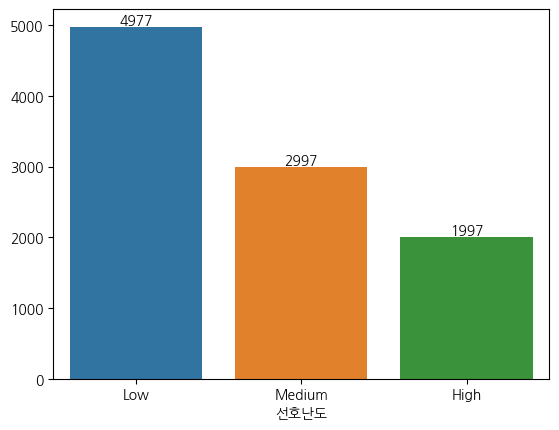

In [15]:
a = df['선호난도'].value_counts()
sns.barplot(x = a.index, y = a.values)

for i, count in enumerate(a.values) :
    plt.text(i, count + 0.1, str(count), ha='center', va = 'bottom')

plt.show()

## 당연한 얘기일수도 있지만 난이도가 낮을 수록 선호도가 높은 것을 확인할 수 있었다. Low 레벨의 콘텐츠 양과 질에도 집중해야겠지만 자연스럽게 다음 레벨로 넘어갈 수 있도록 커리큘럼을 디자인해야겠다.

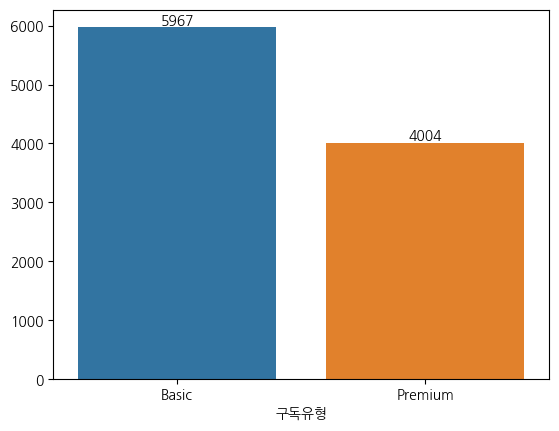

In [16]:
b = df['구독유형'].value_counts()
sns.barplot(x = b.index, y = b.values)

for i, count in enumerate(b.values) :
    plt.text(i, count + 0.1, str(count), ha='center', va = 'bottom')

plt.show()

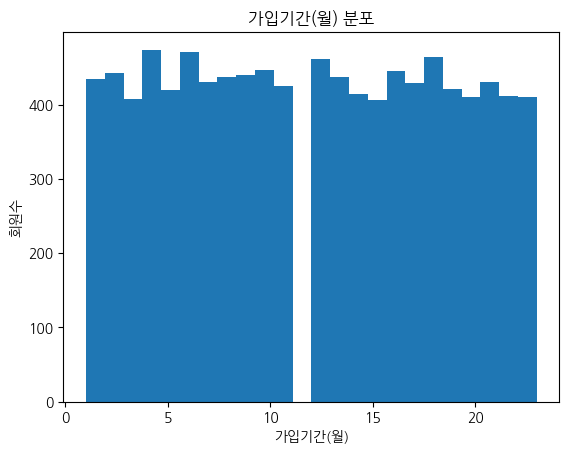

In [17]:
plt.hist(df['가입기간(월)'], bins=24)
plt.xlabel('가입기간(월)')
plt.ylabel('회원수')
plt.title('가입기간(월) 분포')
plt.show()

In [18]:
df['연장여부'].value_counts()

연장여부
1    6183
0    3788
Name: count, dtype: int64

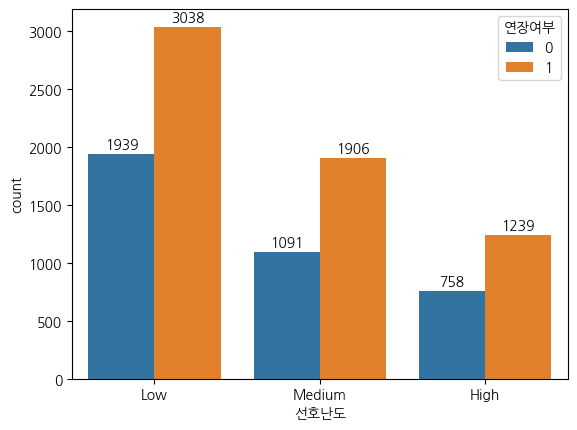

In [19]:
nums = df.groupby('선호난도')['연장여부'].value_counts()

bar = sns.countplot(x = '선호난도', hue = '연장여부', data = df)

for i in bar.patches :
    height = i.get_height()
    bar.text(i.get_x() + i.get_width() / 2, height + 50, f'{int(height)}', ha = 'center')
    
plt.show()

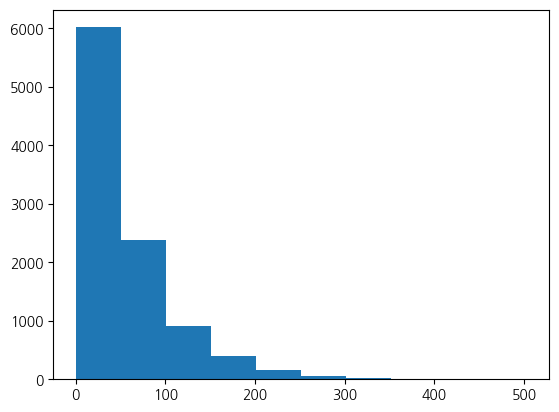

In [20]:
plt.hist(df['학습평균시간(분)'], bins=10)
plt.show()

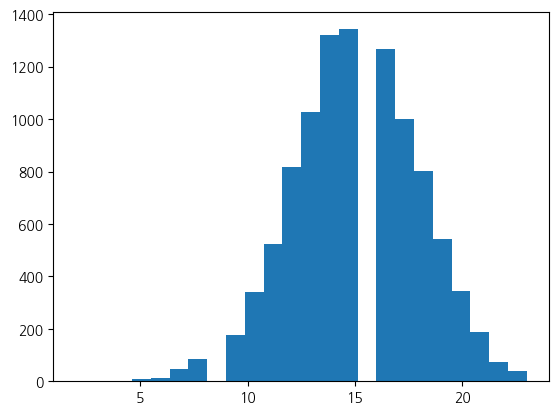

In [21]:
plt.hist(df['평균접속시간'], bins=24)
plt.show()

In [22]:
df['평균접속시간'].value_counts().sort_index()

평균접속시간
2        1
3        2
4        2
5        7
6       11
7       47
8       86
9      175
10     342
11     522
12     819
13    1028
14    1321
15    1343
16    1268
17    1000
18     804
19     544
20     344
21     189
22      75
23      41
Name: count, dtype: int64

In [23]:
x = df['평균접속시간'].value_counts()[range(9, 19)].sum()

ratio = x / df['평균접속시간'].value_counts().sum()

ratio

0.8647076521913549

## hist 중간에 왜 비는지는..못찾겠다. 아마 데이터형태를 변환해주는 과정에서 뭔가 오류가 있었던거 같긴 한데..못찾겠다..아무튼 우리 플랫폼은 9시부터 접속자가 증가하며 14시~15시 사이에 피크를 찍고 점차 감소하고 있다. 9-18시 사이의 사용자가 86.5%에 달하는 만큼 이 시간에 발생하는 고객문의, 커뮤니티 관리, 서버 관리 등 고객 관리에 집중할 필요가 있겠다.

## 0, 1 시 데이터가 없는 것은 아까 24시 이후 데이터를 지워버린 탓일까? 아무튼 크게 영향은 없을거 같으니 냅두자

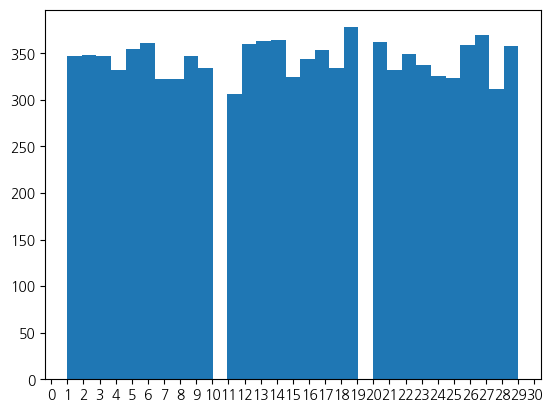

In [24]:
plt.hist(df['최종로그인(일)'], bins=31)
plt.xticks(range(0, 31))
plt.show()

## 에라이. 지표도 많은데 하나씩 보니깐 너무 오래 걸릴거 같다. 한번에 다 찍어보자.

In [25]:
# sns.pairplot(df) # 되게 오래 걸리네. 이미지는 저장했으니 주석처리 해주자

여러가지 지표를 연장여부와 상관관계를 나타내보았지만, 유일하게 눈에 띄는 지표는 학습평균시간(각 학습 세션에 소요된 평균 시간 (분)) 과의 추이였다. 학습평균시간(분)이 일정 수치가 넘어서는 사용자는 구독을 100% 연장하였다. '학습평균시간(분)'이라는 지표는 어떤 의미가 있을까?

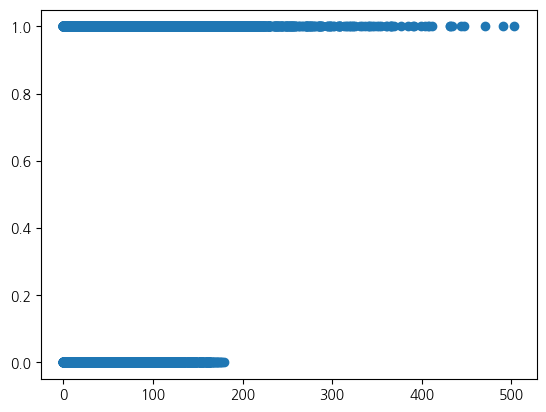

In [26]:
plt.scatter(df['학습평균시간(분)'], df['연장여부'])

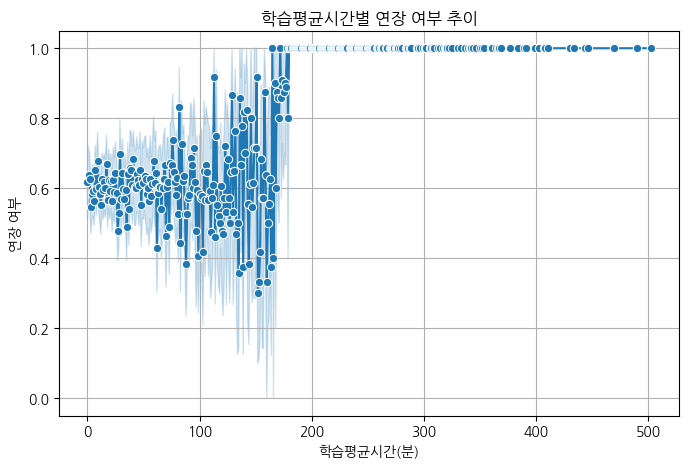

In [27]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='학습평균시간(분)', y='연장여부', data=df, marker='o')
plt.title('학습평균시간별 연장 여부 추이')
plt.xlabel('학습평균시간(분)')
plt.ylabel('연장 여부')
plt.grid(True)
plt.show()

In [28]:
df[df['학습평균시간(분)']>178]['연장여부'].min()

0

In [29]:
df[df['학습평균시간(분)']>179]['연장여부'].min()

1

In [30]:
df[df['학습평균시간(분)']>179]['연장여부'].value_counts()

연장여부
1    402
Name: count, dtype: int64

In [31]:
df['학습평균시간(분)'].mean()

54.88276000401164

## 전체의 4%에 불과하는 비중이지만 일정시간 이상 사용할 시(평균의 3배 이상인) 100%가 구독을 연장한다는데에서는 의미가 있는 지표라고 생각한다.

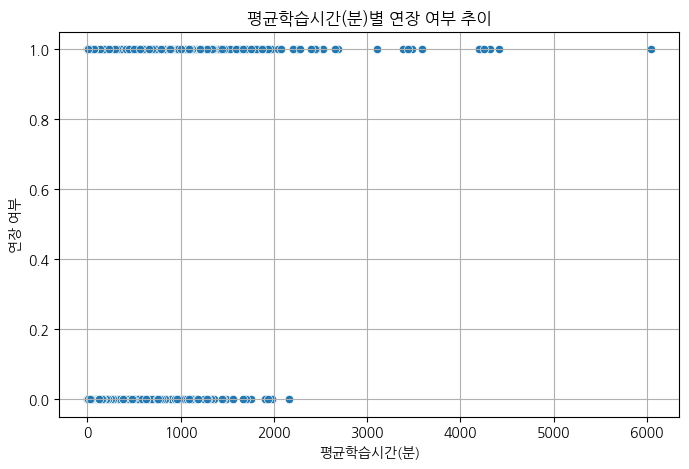

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='평균학습시간(분)', y='연장여부', data=df, marker='o')
plt.title('평균학습시간(분)별 연장 여부 추이')
plt.xlabel('평균학습시간(분)')
plt.ylabel('연장 여부')
plt.grid(True)
plt.show()

In [33]:
df[df['월접속시간(분)']>3057]['연장여부'].min()

0

In [34]:
df[df['월접속시간(분)']>3058]['연장여부'].min()

1

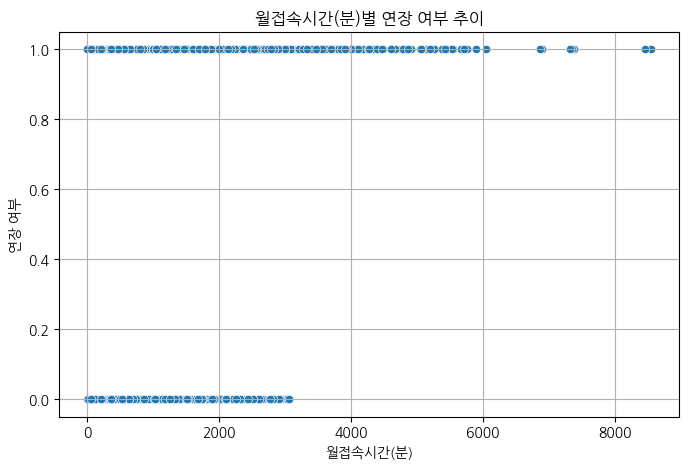

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='월접속시간(분)', y='연장여부', data=df, marker='o')
plt.title('월접속시간(분)별 연장 여부 추이')
plt.xlabel('월접속시간(분)')
plt.ylabel('연장 여부')
plt.grid(True)
plt.show()

## 학습평균시간이 일정수치 이상인 사람은 연장을 취소하지 않는다????? 학습에 오래 걸릴수록 연장을 한다??????????????? 범주형 데이터와의 관계를 다시 확인해보자

구독유형과 선호난도가 연장여부에 어떤 영향을 미치는지 확인해보자

In [36]:
df.pivot_table(values = '연장여부', index = '구독유형', columns = '선호난도')

선호난도,High,Low,Medium
구독유형,,,
Basic,0.623980,0.604930,0.630822
Premium,0.614786,0.618734,0.643084


이중인덱스로 비교해보자

In [37]:
df.pivot_table(index = ['구독유형', '선호난도'], values = '연장여부', aggfunc = 'mean')

연장여부
구독유형    선호난도            
Basic   High    0.623980
        Low     0.604930
        Medium  0.630822
Premium High    0.614786
        Low     0.618734
        Medium  0.643084

학습평균시간과도 비교해보자

In [38]:
pivot_df = df.pivot_table(values='학습평균시간(분)', index='선호난도', columns='구독유형', aggfunc='mean')
pivot_df

구독유형,Basic,Premium
선호난도,,
High,42.796900,57.214008
Low,52.604930,70.910886
Medium,45.179413,58.918124


조금 유의미하게 눈에 띄는 차이가 있는거 같다. 히트맵을 찍어보자

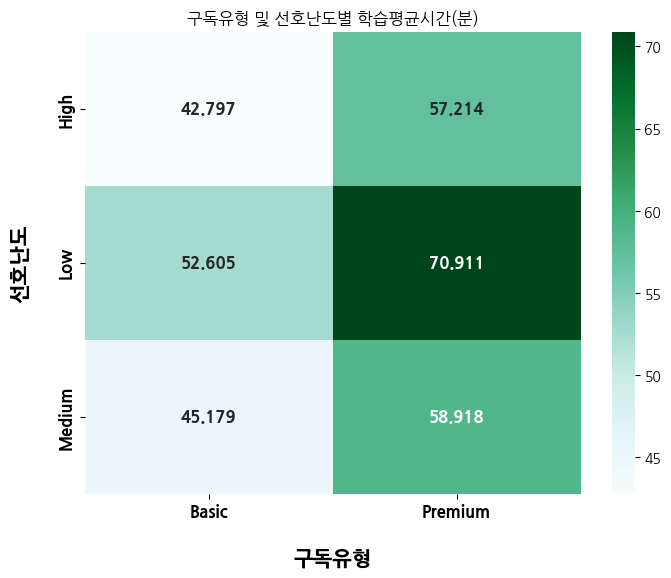

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot = True, fmt = ".3f", cmap = 'BuGn', annot_kws = {"size": 12, "weight": "bold"})

plt.xticks(fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12, weight = 'bold')

plt.title('구독유형 및 선호난도별 학습평균시간(분)')
plt.xlabel('구독유형', fontsize = 15, weight = 'bold', labelpad = 20)
plt.ylabel('선호난도', fontsize = 15, weight = 'bold', labelpad = 20)
plt.show()

In [40]:
df['구독유형'].value_counts()

구독유형
Basic      5967
Premium    4004
Name: count, dtype: int64

In [41]:
df['연장여부'].value_counts()

연장여부
1    6183
0    3788
Name: count, dtype: int64

## 학습평균시간이 일정수치 이상일 때 구독을 연장한다고 가정하였을때, 구독 유형에 따라 학습평균시간이 유의미하게 증가하는 것을 확인 할 수 있었다.

## Basic 과 Premium 의 비율이 6 : 4 정도인데 Premium 의 비율을 늘린다면 구독 연장에 유의미하게 영향이 있지 않을까? 구독 유형에 따른 지표를 분석해보자

In [42]:
df.pivot_table(index = ['선호난도', '구독유형'], values = ['학습평균시간(분)', '커뮤참여도', '완료코스'], aggfunc = 'mean')

완료코스     커뮤참여도  학습평균시간(분)
선호난도   구독유형                                   
High   Basic    10.002447  3.061990  42.796900
       Premium  13.114137  4.399481  57.214008
Low    Basic    12.088274  3.795470  52.604930
       Premium  15.064304  4.797468  70.910886
Medium Basic     9.883841  3.025877  45.179413
       Premium  12.961844  4.347377  58.918124

Premium이 Basic에 비해 눈에 띄게 차이나는 지표는 '완료코스', '커뮤참여도', '학습평균시간(분)' 3가지였다. 

C:\Users\USER\AppData\Local\Temp\ipykernel_17192\995262554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['구독유형'] = b['구독유형'].apply(lambda x: 1 if x == 'Premium' else 0)


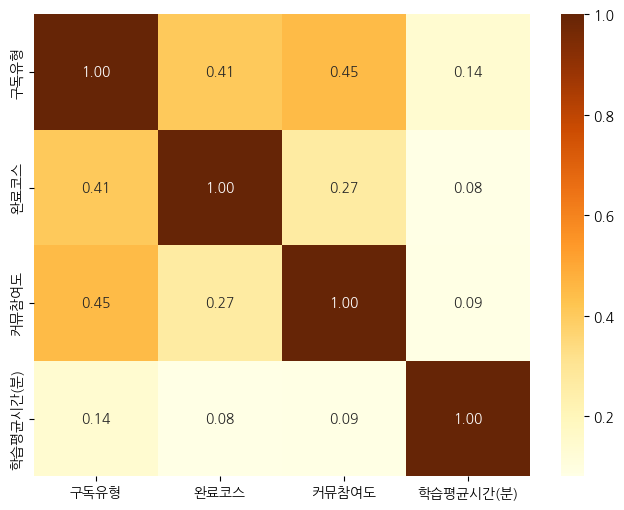

In [43]:
a = ['구독유형', '완료코스', '커뮤참여도', '학습평균시간(분)']
b = df[a]

b['구독유형'] = b['구독유형'].apply(lambda x: 1 if x == 'Premium' else 0)

c = b.corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(c, annot=True, cmap='YlOrBr', fmt='.2f', annot_kws={"size": 10})
plt.show()

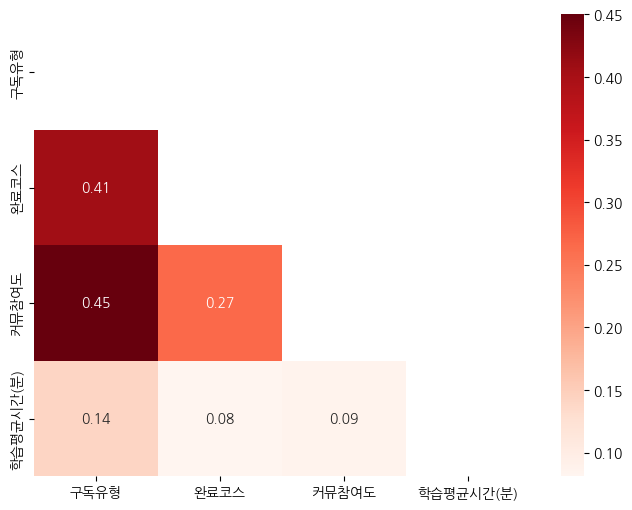

In [44]:
mask = np.triu(np.ones_like(c, dtype=bool))

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(c, annot=True, cmap='Reds', fmt='.2f', mask=mask, annot_kws={"size": 10})
plt.show()

## Premium 사용자가 완료코스, 커뮤참여도 부분에서 눈에 띄게 활동적인 것을 알 수 있었다. 학습평균시간(분) 에서도 소폭 영향이 있었다. Basic 회원에 비해 Premium 회원이 서비스에 대한 만족도가 높으리라 예상됩니다.

## 가격적인 진입장벽을 잠시 낮춰서 Basic 사용자를 Premium 구독으로 전환한다면 상당수 만족도를 느끼고 구독 유형을 Premium 으로 유지할 수 있지 않을까?

## Basic 유저에게는 3개월간 Premium으로 구독을 업그레이드해주고 신규고객에게는 Basic 가격으로 Premium 구독을 제공하면 신규/기존 회원 모두에게 효과적인 프로모션이 될 것으로 예상됩니다.

In [45]:
df

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부,월접속시간(분),평균학습시간(분)
0,b919c29d,13,14,15,8,18,16,68,3,4,Low,Basic,4,5,0,128,7
1,a0a60abb,16,18,18,73,16,13,98,2,3,Medium,Basic,1,6,1,949,59
2,b9f171ae,22,1,16,22,13,14,94,3,4,Medium,Premium,0,7,1,308,23
3,5dc0ba8b,1,19,18,43,19,18,70,0,3,Low,Basic,1,0,1,774,40
4,65c83654,4,5,21,31,19,10,82,2,4,Medium,Basic,3,0,1,310,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,15,84,18,16,65,2,5,Low,Premium,1,1,1,1344,74
9996,24588752,10,11,19,45,9,8,83,3,3,Medium,Basic,2,7,1,360,40
9997,e4622a54,7,27,18,127,24,14,82,3,5,High,Basic,1,6,1,1778,74
9998,e07fbad9,11,7,19,5,10,10,90,4,5,Low,Basic,2,0,1,50,5


# 결제패턴이 7(3개월 모두 결제함) 인 회원을 가장 안정적이고 서비스에 만족하고 있다고 가정해보자. 다른 결제패턴의 사용자와 어떻게 다른 패턴을 보이는지, 특히 0(3개월 동안 결제하지 않음) 과는 어떤 차이를 보이는지 찾아보자

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9971 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   아이디        9971 non-null   object
 1   가입기간(월)    9971 non-null   int64 
 2   최종로그인(일)   9971 non-null   int64 
 3   평균접속시간     9971 non-null   int32 
 4   학습평균시간(분)  9971 non-null   int32 
 5   월간학습일      9971 non-null   int64 
 6   완료코스       9971 non-null   int64 
 7   학습성취도      9971 non-null   int32 
 8   중단학습수      9971 non-null   int64 
 9   커뮤참여도      9971 non-null   int64 
 10  선호난도       9971 non-null   object
 11  구독유형       9971 non-null   object
 12  문의이력       9971 non-null   int64 
 13  결제패턴       9971 non-null   int64 
 14  연장여부       9971 non-null   int64 
 15  월접속시간(분)   9971 non-null   int64 
 16  평균학습시간(분)  9971 non-null   int32 
dtypes: int32(4), int64(10), object(3)
memory usage: 1.2+ MB


In [47]:
df.describe(include = 'all')

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부,월접속시간(분),평균학습시간(분)
count,9971,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971,9971,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
unique,9971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4977,5967,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.897804,15.015545,14.967405,54.882760,12.548691,12.226356,75.025674,3.044429,3.885869,NaN,NaN,2.009628,3.502658,0.620098,687.499448,107.359743
std,NaN,6.600924,8.365333,2.977994,56.010663,6.933971,3.632989,9.971401,1.755613,1.262376,NaN,NaN,1.421467,2.311471,0.485386,780.734344,248.513748
min,NaN,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,36.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.000000,15.000000,7.000000,10.000000,68.000000,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000,169.000000,14.000000
50%,NaN,12.000000,15.000000,15.000000,38.000000,13.000000,12.000000,75.000000,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000,432.000000,39.000000
75%,NaN,18.000000,22.000000,17.000000,76.000000,19.000000,15.000000,82.000000,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000,912.000000,97.000000


In [48]:
df1 = df.sort_values(by = '결제패턴', ascending = False)
df1

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부,월접속시간(분),평균학습시간(분)
5005,27ec531b,11,18,15,42,21,11,73,3,5,Medium,Basic,4,7,1,462,22
6491,33867fb1,16,19,10,34,17,8,85,4,3,Low,Basic,0,7,1,272,16
6499,f535535d,6,14,13,57,16,8,76,0,5,Low,Basic,1,7,1,456,28
6502,548d674b,21,22,19,7,23,9,76,2,3,High,Premium,4,7,1,63,2
6504,fc7c1cf7,7,11,15,45,1,12,67,1,1,Medium,Basic,1,7,1,540,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,b24d855c,17,1,17,15,6,15,73,0,4,Low,Premium,1,0,1,225,37
8905,e65067f2,2,12,9,58,16,15,74,2,5,Medium,Premium,2,0,1,870,54
4009,be155f2b,19,23,10,33,4,18,92,5,3,Medium,Premium,3,0,1,594,148
2216,926604cf,14,20,15,74,6,17,85,0,4,Low,Basic,1,0,0,1258,209


In [49]:
df1['결제패턴'].value_counts()

결제패턴
7    1281
1    1280
0    1273
6    1263
5    1234
3    1228
4    1211
2    1201
Name: count, dtype: int64

In [50]:
df_pivot = df.pivot_table(index = ['결제패턴'], values = ['가입기간(월)', '최종로그인(일)', '평균접속시간', '학습평균시간(분)', '월간학습일', '완료코스', '학습성취도', '중단학습수', '커뮤참여도', '문의이력', '연장여부'], aggfunc = 'mean')
df_pivot

,가입기간(월),문의이력,연장여부,완료코스,월간학습일,중단학습수,최종로그인(일),커뮤참여도,평균접속시간,학습성취도,학습평균시간(분)
결제패턴,,,,,,,,,,,
0,11.935585,1.996072,0.633150,12.238020,12.747840,2.934014,14.897093,3.881383,14.912019,74.895522,52.207384
1,12.018750,2.051563,0.609375,12.364062,12.713281,3.020313,14.847656,3.985156,15.000781,75.141406,57.803906
2,11.702748,2.000000,0.621982,12.212323,12.236470,3.167361,14.930058,3.879267,14.885928,75.632806,54.115737
3,12.175081,2.004072,0.619707,12.343648,12.389251,3.057003,15.350163,3.864007,14.863192,74.579805,55.578990
4,11.759703,2.042114,0.620149,12.168456,12.565648,3.001652,14.764657,3.880264,15.036334,75.011561,57.341866
5,11.791734,1.913290,0.606969,12.111021,12.545381,3.083468,15.128039,3.854133,15.007293,75.065640,54.623987
6,11.858274,2.014252,0.630245,12.192399,12.664291,3.036421,15.199525,3.886778,15.011876,74.911322,53.353919
7,11.928181,2.053084,0.619048,12.177205,12.505074,3.061671,15.007806,3.853240,15.017955,74.985168,54.106167


<Axes: ylabel='결제패턴'>

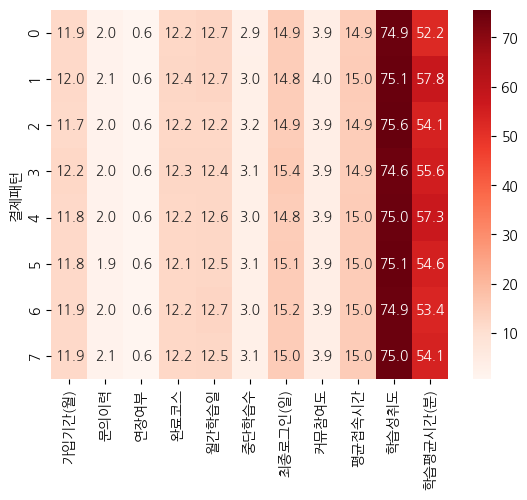

In [51]:
sns.heatmap(df_pivot, annot = True, cmap = 'Reds', fmt='.1f')

## 음..이렇게 봐서는 크게 눈에 띄는게 없는거 같다. 다른 지표와 비교해보자.

In [52]:
level = {'Low' : 0, 'Medium' : 1, 'High' : 2}
rate = {'Basic' : 0, 'Premium' : 1}

df1['선호난도'] = df['선호난도'].map(level)
df1['구독유형'] = df['구독유형'].map(rate)

df1

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부,월접속시간(분),평균학습시간(분)
5005,27ec531b,11,18,15,42,21,11,73,3,5,1,0,4,7,1,462,22
6491,33867fb1,16,19,10,34,17,8,85,4,3,0,0,0,7,1,272,16
6499,f535535d,6,14,13,57,16,8,76,0,5,0,0,1,7,1,456,28
6502,548d674b,21,22,19,7,23,9,76,2,3,2,1,4,7,1,63,2
6504,fc7c1cf7,7,11,15,45,1,12,67,1,1,1,0,1,7,1,540,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,b24d855c,17,1,17,15,6,15,73,0,4,0,1,1,0,1,225,37
8905,e65067f2,2,12,9,58,16,15,74,2,5,1,1,2,0,1,870,54
4009,be155f2b,19,23,10,33,4,18,92,5,3,1,1,3,0,1,594,148
2216,926604cf,14,20,15,74,6,17,85,0,4,0,0,1,0,0,1258,209


In [53]:
df1_pivot = df1.pivot_table(index = ['결제패턴'], values = ['연장여부', '선호난도', '구독유형'], aggfunc = 'mean')
df1_pivot

,구독유형,선호난도,연장여부
결제패턴,,,
0,0.402200,0.684996,0.633150
1,0.435937,0.655469,0.609375
2,0.422148,0.714405,0.621982
3,0.418567,0.724756,0.619707
4,0.370768,0.681255,0.620149
5,0.376823,0.708266,0.606969
6,0.394299,0.724466,0.630245
7,0.391101,0.716628,0.619048


<Axes: ylabel='결제패턴'>

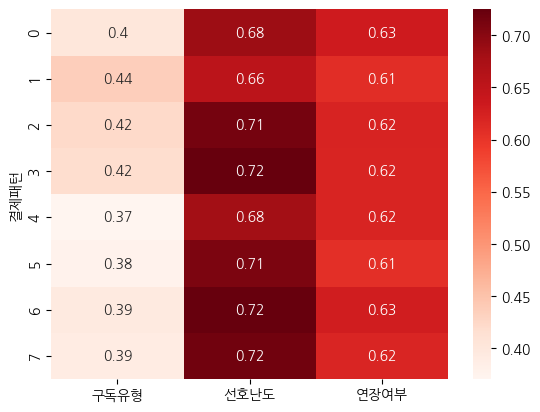

In [54]:
sns.heatmap(df1_pivot, annot = True, cmap = 'Reds')

In [59]:
df1['구독유형'].mean(), df1['선호난도'].mean()

(0.4015645371577575, 0.7011332865309398)

In [61]:
df2 = df1[df1['결제패턴'] % 2 == 0]

df2_pivot = df2.pivot_table(index = ['결제패턴'], values = ['선호난도', '구독유형', '연장여부'], aggfunc = 'mean')
df2_pivot

,구독유형,선호난도,연장여부
결제패턴,,,
0,0.402200,0.684996,0.633150
2,0.422148,0.714405,0.621982
4,0.370768,0.681255,0.620149
6,0.394299,0.724466,0.630245


In [57]:
df2['구독유형'].mean(), df2['선호난도'].mean()

(0.3973322554567502, 0.7012934518997574)

In [62]:
df3 = df1[df1['결제패턴'] % 2 == 1]

df3_pivot = df3.pivot_table(index = ['결제패턴'], values = ['선호난도', '구독유형', '연장여부'], aggfunc = 'mean')
df3_pivot

,구독유형,선호난도,연장여부
결제패턴,,,
1,0.435937,0.655469,0.609375
3,0.418567,0.724756,0.619707
5,0.376823,0.708266,0.606969
7,0.391101,0.716628,0.619048


In [64]:
df3['구독유형'].mean(), df3['선호난도'].mean(), df3['연장여부'].mean()

(0.40573362532351187, 0.7009755126418475, 0.6137766275134382)

## 결제패턴이 1(마지막 달에만 결제함) 일 경우 다른 패턴에 비해 Premium 비율이 10%정도 높았지만 선호난도는 5%정도 낮았다.

## 이 외에도 결제패턴이 1일 경우 학습평균시간(분)이 소폭 높은 것을 알 수 있었다.

## 반대로 마지막 달에 결제하지 않은 경우(0, 2, 4, 6) Premium 비율이 소폭 낮았지만 연장여부에는 소폭 상승하였다


## 결제시스템이 1개월 단위로만 가능한지, 장기 구독이 가능한지 확인 할 수 없지만 마지막 달에 결제하였을 때(1, 3, 5, 7) 구독 연장으로 이어지는 경우가 소폭 감소함을 알 수 있었다. 마지막 달에 결제하는 사용자에게 알림 메시지를 보내는 등 구독 연장을 할 수 있도록 유도해봐야겠다.

In [60]:
df1

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부,월접속시간(분),평균학습시간(분)
5005,27ec531b,11,18,15,42,21,11,73,3,5,1,0,4,7,1,462,22
6491,33867fb1,16,19,10,34,17,8,85,4,3,0,0,0,7,1,272,16
6499,f535535d,6,14,13,57,16,8,76,0,5,0,0,1,7,1,456,28
6502,548d674b,21,22,19,7,23,9,76,2,3,2,1,4,7,1,63,2
6504,fc7c1cf7,7,11,15,45,1,12,67,1,1,1,0,1,7,1,540,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,b24d855c,17,1,17,15,6,15,73,0,4,0,1,1,0,1,225,37
8905,e65067f2,2,12,9,58,16,15,74,2,5,1,1,2,0,1,870,54
4009,be155f2b,19,23,10,33,4,18,92,5,3,1,1,3,0,1,594,148
2216,926604cf,14,20,15,74,6,17,85,0,4,0,0,1,0,0,1258,209


## 결제패턴을 8가지에서 2가지로 좁혀서 봐보자(마지막 달 결제 여부). 0은 마지막달 미결제, 1은 마지막달 결제

In [67]:
df2 = df1
df2['결제패턴'] = df2['결제패턴'].apply(lambda x :  0 if x % 2 == 0 else 1)

df2

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부,월접속시간(분),평균학습시간(분)
5005,27ec531b,11,18,15,42,21,11,73,3,5,1,0,4,1,1,462,22
6491,33867fb1,16,19,10,34,17,8,85,4,3,0,0,0,1,1,272,16
6499,f535535d,6,14,13,57,16,8,76,0,5,0,0,1,1,1,456,28
6502,548d674b,21,22,19,7,23,9,76,2,3,2,1,4,1,1,63,2
6504,fc7c1cf7,7,11,15,45,1,12,67,1,1,1,0,1,1,1,540,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,b24d855c,17,1,17,15,6,15,73,0,4,0,1,1,0,1,225,37
8905,e65067f2,2,12,9,58,16,15,74,2,5,1,1,2,0,1,870,54
4009,be155f2b,19,23,10,33,4,18,92,5,3,1,1,3,0,1,594,148
2216,926604cf,14,20,15,74,6,17,85,0,4,0,0,1,0,0,1258,209


In [68]:
df2_pivot = df2.pivot_table(index = ['결제패턴'], values = ['학습평균시간(분)', '연장여부', '구독유형', '선호난도'], aggfunc = 'mean')
df2_pivot

,구독유형,선호난도,연장여부,학습평균시간(분)
결제패턴,,,,
0,0.397332,0.701293,0.626516,54.219887
1,0.405734,0.700976,0.613777,55.535736


<Axes: ylabel='결제패턴'>

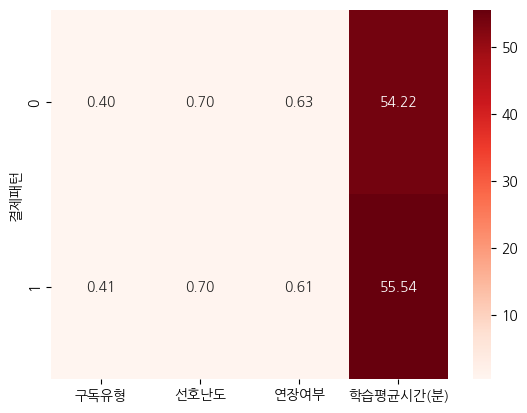

In [74]:
sns.heatmap(df2_pivot, annot = True, cmap = 'Reds', fmt = '.2f')

In [70]:
df2['결제패턴'].value_counts()

결제패턴
1    5023
0    4948
Name: count, dtype: int64

## 학습평균시간(분)이 일정치 이상일 때 구독을 한다고 볼 수 있었지만 일반적인 범위 내에서는 상반되는 결과(56 -> 54)와 결제패턴이 조금 더 유의미하게 연장여부로 이어지는 것을 알 수 있었다(0.61 -> 0.63)

## 결제패턴을 두가지로 나눈 기준으로 분석하였을때 신뢰도가 높을지는 의문이지만 그럼에도 마지막 달 결제 여부는 상당히 중요한 지표라고 생각된다.

# 다시 전체 데이터를 봐보자

In [65]:
df1

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부,월접속시간(분),평균학습시간(분)
5005,27ec531b,11,18,15,42,21,11,73,3,5,1,0,4,1,1,462,22
6491,33867fb1,16,19,10,34,17,8,85,4,3,0,0,0,1,1,272,16
6499,f535535d,6,14,13,57,16,8,76,0,5,0,0,1,1,1,456,28
6502,548d674b,21,22,19,7,23,9,76,2,3,2,1,4,1,1,63,2
6504,fc7c1cf7,7,11,15,45,1,12,67,1,1,1,0,1,1,1,540,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,b24d855c,17,1,17,15,6,15,73,0,4,0,1,1,0,1,225,37
8905,e65067f2,2,12,9,58,16,15,74,2,5,1,1,2,0,1,870,54
4009,be155f2b,19,23,10,33,4,18,92,5,3,1,1,3,0,1,594,148
2216,926604cf,14,20,15,74,6,17,85,0,4,0,0,1,0,0,1258,209


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9971 entries, 5005 to 8529
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   아이디        9971 non-null   object
 1   가입기간(월)    9971 non-null   int64 
 2   최종로그인(일)   9971 non-null   int64 
 3   평균접속시간     9971 non-null   int32 
 4   학습평균시간(분)  9971 non-null   int32 
 5   월간학습일      9971 non-null   int64 
 6   완료코스       9971 non-null   int64 
 7   학습성취도      9971 non-null   int32 
 8   중단학습수      9971 non-null   int64 
 9   커뮤참여도      9971 non-null   int64 
 10  선호난도       9971 non-null   int64 
 11  구독유형       9971 non-null   int64 
 12  문의이력       9971 non-null   int64 
 13  결제패턴       9971 non-null   int64 
 14  연장여부       9971 non-null   int64 
 15  월접속시간(분)   9971 non-null   int64 
 16  평균학습시간(분)  9971 non-null   int32 
dtypes: int32(4), int64(12), object(1)
memory usage: 1.2+ MB


In [67]:
df1.describe(include = 'all')

,아이디,가입기간(월),최종로그인(일),평균접속시간,학습평균시간(분),월간학습일,완료코스,학습성취도,중단학습수,커뮤참여도,선호난도,구독유형,문의이력,결제패턴,연장여부,월접속시간(분),평균학습시간(분)
count,9971,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
unique,9971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,27ec531b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.897804,15.015545,14.967405,54.882760,12.548691,12.226356,75.025674,3.044429,3.885869,0.701133,0.401565,2.009628,0.503761,0.620098,687.499448,107.359743
std,NaN,6.600924,8.365333,2.977994,56.010663,6.933971,3.632989,9.971401,1.755613,1.262376,0.781133,0.490239,1.421467,0.500011,0.485386,780.734344,248.513748
min,NaN,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,36.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.000000,15.000000,7.000000,10.000000,68.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,169.000000,14.000000
50%,NaN,12.000000,15.000000,15.000000,38.000000,13.000000,12.000000,75.000000,3.000000,4.000000,1.000000,0.000000,2.000000,1.000000,1.000000,432.000000,39.000000
75%,NaN,18.000000,22.000000,17.000000,76.000000,19.000000,15.000000,82.000000,4.000000,5.000000,1.000000,1.000000,3.000000,1.000000,1.000000,912.000000,97.000000


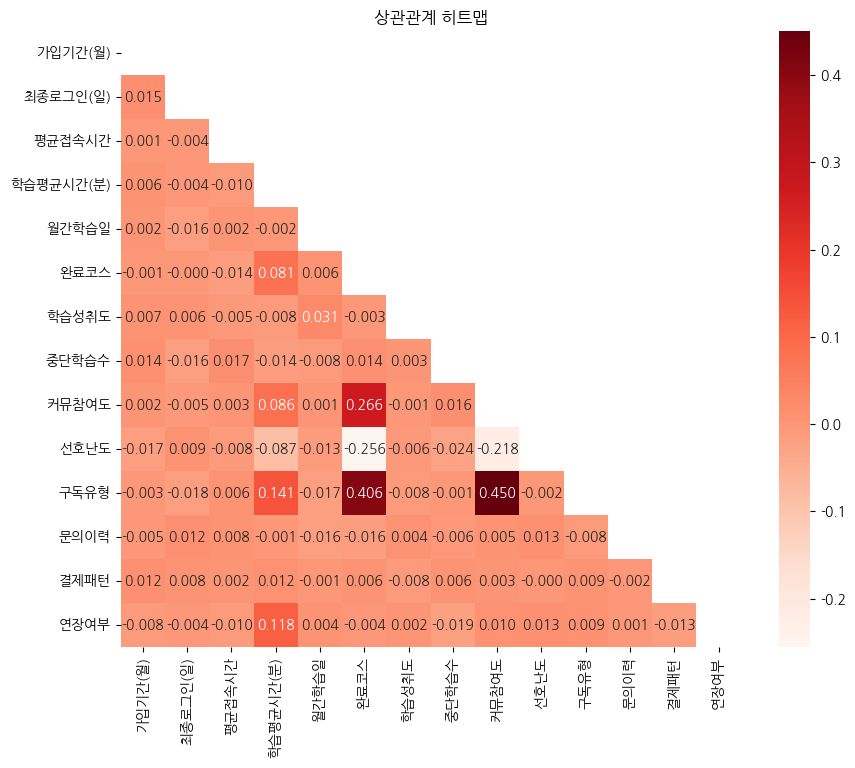

In [68]:
a = df1.iloc[:, 1:-2]
b = a.corr()

mask = np.triu(np.ones_like(b, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(b, annot=True, mask = mask, cmap='Reds', fmt='.3f')
plt.title('상관관계 히트맵')
plt.show()

## 양의 상관관계는 어느정도 다 본거 같다. 음도 한번 보자

In [69]:
df_pivot = df.pivot_table(index = ['선호난도'], values = ['학습평균시간(분)', '완료코스', '커뮤참여도'], aggfunc = 'mean')
df_pivot

,완료코스,커뮤참여도,학습평균시간(분)
선호난도,,,
High,11.203806,3.578368,48.363045
Low,13.269238,4.193088,59.869198
Medium,11.175843,3.580581,50.946280


<Axes: ylabel='선호난도'>

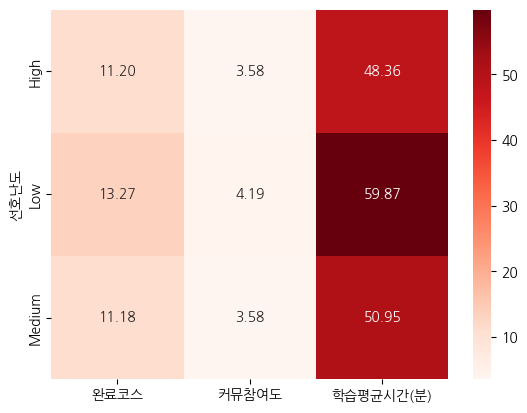

In [70]:
sns.heatmap(df_pivot, annot = True, cmap = 'Reds', fmt='.2f')

In [71]:
df['선호난도'].value_counts()

선호난도
Low       4977
Medium    2997
High      1997
Name: count, dtype: int64

## 앞서 활동적인 지표로 보았던 3가지와 겹치네. 3가지 지표에서 모두 Low 레벨을 선호하는 사용자가 활동적이라고 볼 수 있었다. 전체 사용자의 50%가 선호하는 레벨인 만큼 긍정적이라고 볼 수도 있지만 Medium, High 레벨 활동성으로 연결되지 못하는데 놓치고 있는게 무엇인지 되새겨 보아야겠다. 단순히 난이도 차이일까?

# 뭘 더 해볼까

# 실패다